In [1]:
# Importing all necessary libraries
import cv2
import os

import torch
from torchvision.transforms.functional import hflip, rotate
from torchvision.transforms import CenterCrop, Resize
import matplotlib.pyplot as plt

VIDEO_PATH = 'video/conv/hyundai-conv1.mp4'
FOLDER_NAME = 'images/' + VIDEO_PATH.split('/')[-1][:-4]

# Read the video from specified path
cam = cv2.VideoCapture(VIDEO_PATH)

try:
	
	# creating a folder named data
	if not os.path.exists(FOLDER_NAME):
		os.makedirs(FOLDER_NAME)

# if not created then raise error
except OSError:
	print ('Error: Creating directory of images')

In [2]:
# num of frame
currentframe = 0

while(True):
    # reading from frame
    ret,frame = cam.read()

    if ret:

        image = torch.from_numpy(frame)
        image = image.permute(2,1,0)
        image = Resize(300)(image)
        image = rotate(image, 270)
        image = hflip(image)
        # if video is still left continue creating images
        name = FOLDER_NAME + '/img' + str(currentframe).zfill(4) + '.jpg'

        # writing the extracted images
        cv2.imwrite(name, image.permute(1,2,0).numpy())
        # cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([848, 848, 3])
torch.Size([

KeyboardInterrupt: 

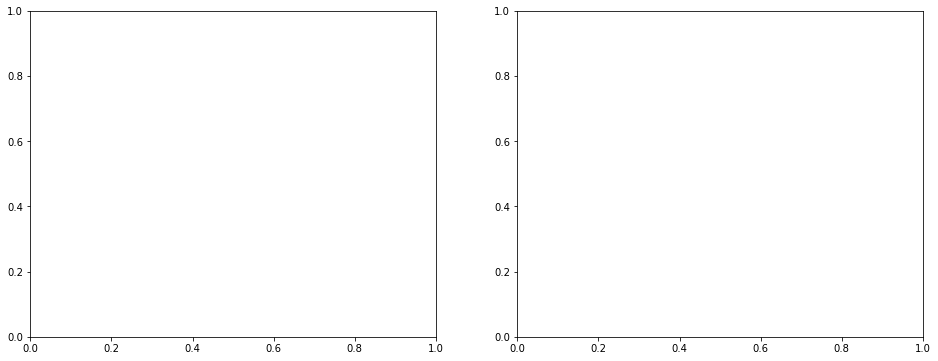

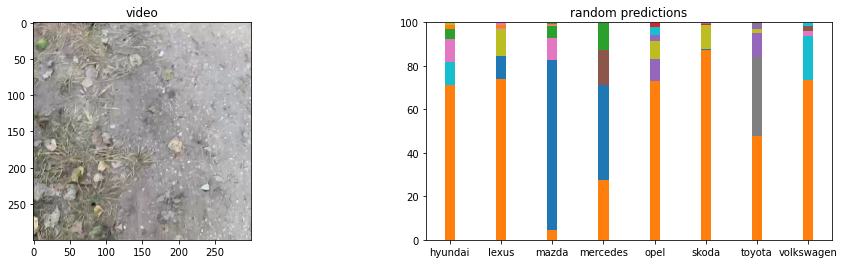

In [ ]:
# fig, axs = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
# size = fig.get_size_inches()*fig.dpi # size in pixels

# ### choose codec according to format needed
# fourcc = cv2.VideoWriter_fourcc(*'MJPG') 
# video = cv2.VideoWriter('video/' + test_path2.split('/')[1] + '_rnd_values.avi', fourcc, 30, (int(size[0]),int(size[1])), isColor=True)

# test_dl_single = DataLoader(test_data, batch_size=1, shuffle=False)


# fig, axs = plt.subplots(figsize=(16,4), nrows=1, ncols=2)
# size = fig.get_size_inches()*fig.dpi # size in pixels
# # i = 0
# for batch in test_dl_single:
#     imgs, label = batch
#     preds = loaded(imgs)
#     prob, best_pred = torch.max(preds.data, 1)
#     for img in imgs:    
#         img = img * torch.tensor([0.229, 0.224, 0.225]).reshape(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).reshape(3,1,1)
#         img = img.permute(1,2,0)
#         # plt.imshow(img)
#         # plt.show()

#         # plt.imshow(img)
#         # plt.show()
#         # fig, axs = plt.subplots(figsize=(16,4), nrows=1, ncols=2)

#         axs[0].imshow(img)
#         axs[0].set_title('video')

#         #creating barplot
#         plt.ylim(0, 100)
#         values = torch.rand(8) * 100
#         axs[1].bar(diz.values(), values, width=0.2)
#         axs[1].set_title('random predictions')
        
#         #saving plot and write on video
#         # buf = io.BytesIO()
#         # plt.savefig(buf, format='jpeg')
#         # buf.seek(0)
#         # frame = Image.open(buf)
#         # plt.imshow(frame)
# #         frame = ToTensor()(frame)
# #         frame = frame.permute(1,2,0)
# #         frame = frame.numpy()
# #         frame = (frame*255).astype(np.uint8)
        
# #         video.write(frame)
        
# # print(i)
# cv2.destroyAllWindows()
# video.release()